In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [7]:
aggregated_tech_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_tech_df.csv')
aggregated_unit_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_unit_df.csv')
aggregated_building_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_building_df.csv')
aggregated_building_unit_tech_df = pd.read_csv('C:/Users/jakob/Desktop/Code Seminar Strategy Mining/dataframes/aggregated_building_unit_tech_df.csv')

In [8]:
from sklearn.cluster import KMeans

def cluster_function(df_to_cluster, columns, num_clusters, title):


    selected_columns = df_to_cluster[columns]
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(selected_columns)
    labels = kmeans.labels_
    df_to_cluster['cluster'] = labels

    centroids = kmeans.cluster_centers_
    feature_means = df_to_cluster.groupby('cluster')[columns].mean()
    
    # Plot the feature importance
    feature_means.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Cluster')
    plt.ylabel('Feature Importance')
    plt.title(title)
    plt.xticks(rotation=0)
    plt.legend(loc='upper left')
    plt.show()

    
    return df_to_cluster

C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


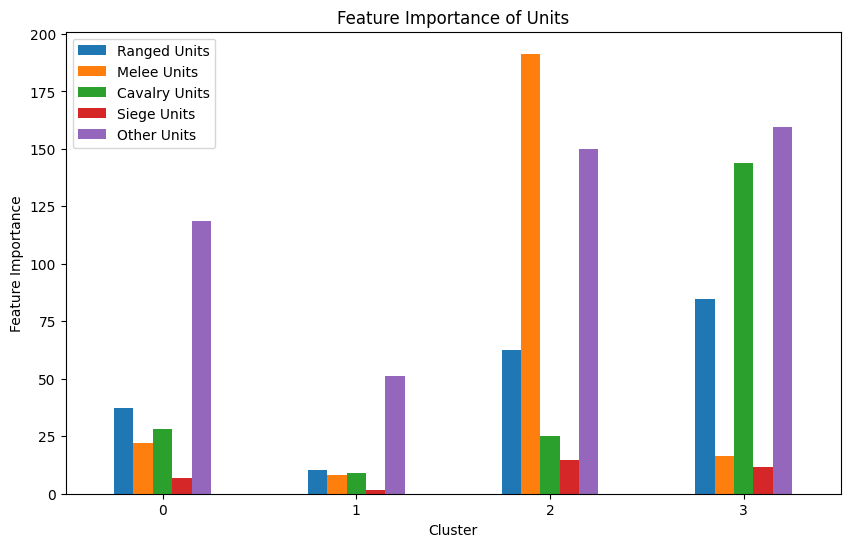

C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


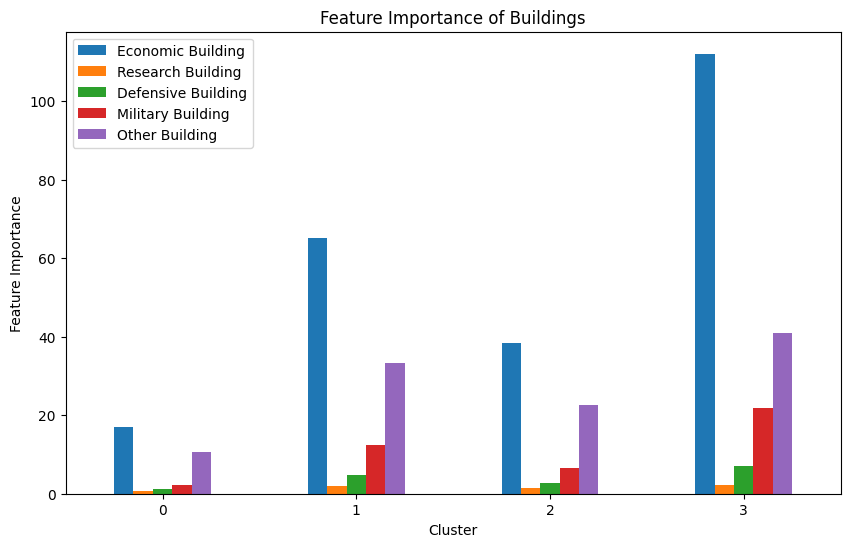

C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


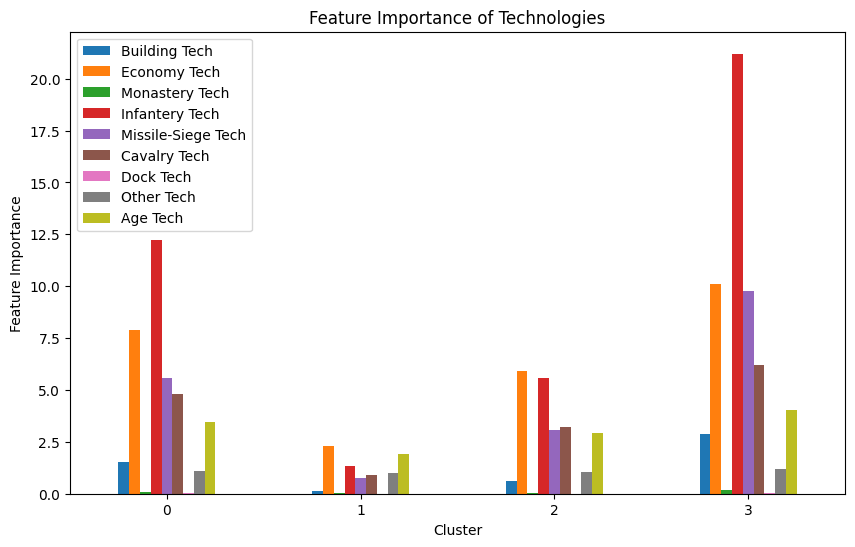

C:\Users\jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


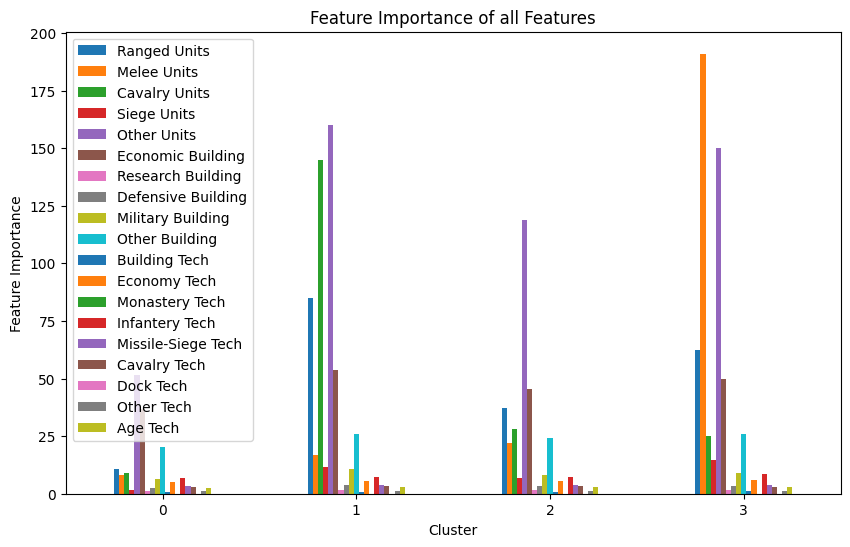

In [9]:
num_clusters = 4

 
aggregated_unit_clustered_df = cluster_function(aggregated_unit_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units'], num_clusters, 'Feature Importance of Units')
aggregated_building_clustered_df = cluster_function(aggregated_building_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building'], num_clusters, 'Feature Importance of Buildings')
aggregated_tech_clustered_df = cluster_function(aggregated_tech_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech'], num_clusters, 'Feature Importance of Technologies')
aggregated_building_unit_tech_df = cluster_function(aggregated_building_unit_tech_df,['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'Economic Building', 'Research Building', 'Defensive Building', 
                                                                                      'Military Building', 'Other Building', 'Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 
                                                                                      'Dock Tech', 'Other Tech', 'Age Tech'], num_clusters, 'Feature Importance of all Features')


In [10]:
def calculate_win_percentage(df, cluster_column, winner_column):
    grouped_df = df.groupby(cluster_column)
    matches_played = grouped_df.size()
    matches_won = grouped_df[winner_column].sum()
    win_percentage = (matches_won / matches_played) * 100
    return win_percentage


In [11]:
win_percentage_aggregated_unit = calculate_win_percentage(aggregated_unit_clustered_df, 'cluster', 'Winner')
win_percentage_aggregated_building = calculate_win_percentage(aggregated_building_clustered_df, 'cluster', 'Winner')
win_percentage_aggregated_tech = calculate_win_percentage(aggregated_tech_clustered_df, 'cluster', 'Winner')
win_percentage_aggregated_building_and_unit_and_tech_df = calculate_win_percentage(aggregated_building_unit_tech_df, 'cluster', 'Winner')

print(win_percentage_aggregated_building)
print(win_percentage_aggregated_tech)
print(win_percentage_aggregated_unit)
print(win_percentage_aggregated_building_and_unit_and_tech_df)


cluster
0    43.474446
1    56.899325
2    50.766401
3    35.551763
dtype: float64
cluster
0    46.438903
1    52.136425
2    46.332046
3    46.337158
dtype: float64


In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca_scatterplot(df_to_PCA, columns, title):

    selected_columns = df_to_PCA[columns]

    X = selected_columns.drop('cluster', axis=1)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    df_pca['cluster'] = selected_columns['cluster']
    clusters = df_pca['cluster'].unique()
    colors = ['red', 'blue', 'green', 'yellow']

    for cluster, color in zip(clusters, colors):
        cluster_data = df_pca[df_pca['cluster'] == cluster]
        plt.scatter(cluster_data['PC1'], cluster_data['PC2'], c=color, label=f'Cluster {cluster}')

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.title(title)

    plt.legend()
    
    #filename = title.replace(' ', '_').lower()
    #save_path = 'C:/Users/jakob/Desktop/Code Seminar Strategy Mining/plots/' + filename + '.png'
    #plt.savefig(save_path)

    plt.show()


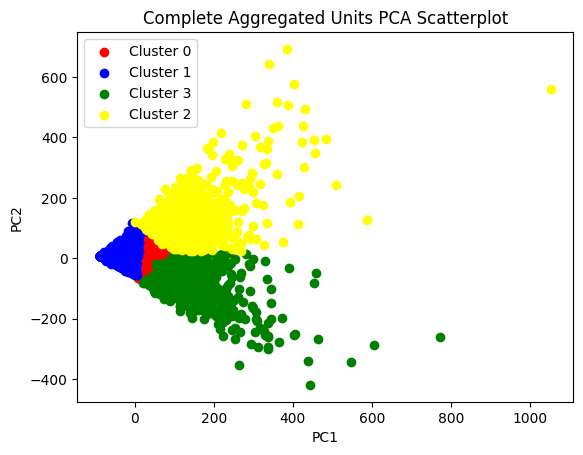

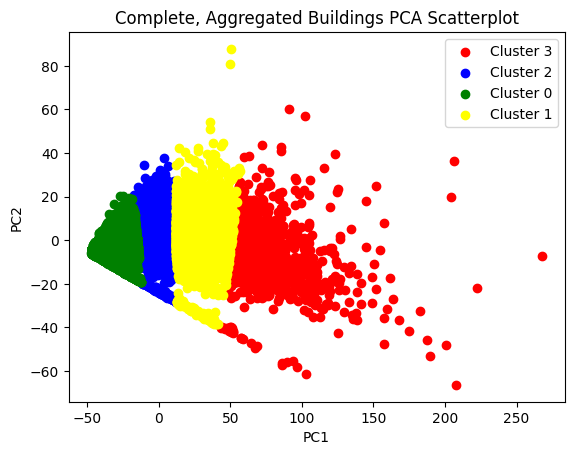

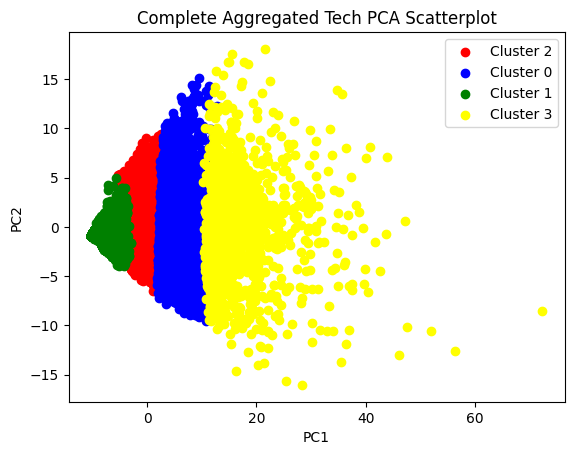

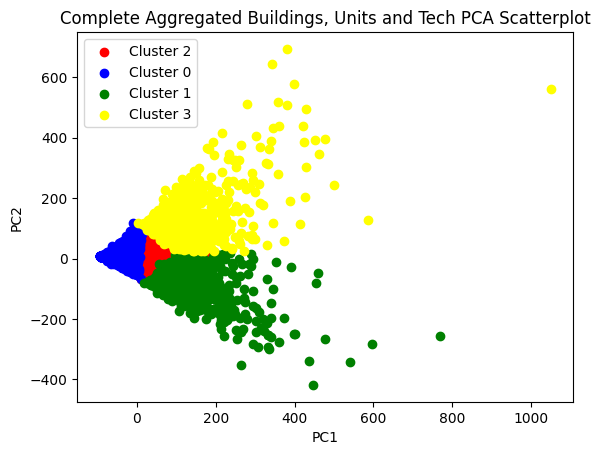

In [13]:
plot_pca_scatterplot(aggregated_unit_clustered_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'cluster'], 'Complete Aggregated Units PCA Scatterplot')
plot_pca_scatterplot(aggregated_building_clustered_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building', 'cluster'], 'Complete, Aggregated Buildings PCA Scatterplot')
plot_pca_scatterplot(aggregated_tech_clustered_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech', 'cluster'], 'Complete Aggregated Tech PCA Scatterplot')
plot_pca_scatterplot(aggregated_building_unit_tech_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building',
                                                         'Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units','Building Tech', 'Economy Tech',
                                                           'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech',
                                                             'cluster' ], 'Complete Aggregated Buildings, Units and Tech PCA Scatterplot')



In [14]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d_scatterplot(df, columns,  title):

    selected_columns = df[columns]
    X = selected_columns.drop('cluster', axis=1)
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
    df_pca['cluster'] = selected_columns['cluster']
    clusters = df_pca['cluster'].unique()
    colors = ['red', 'blue', 'green', 'yellow'] 

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for cluster, color in zip(clusters, colors):
        cluster_data = df_pca[df_pca['cluster'] == cluster]
        ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], c=color, label=f'Cluster {cluster}')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    ax.set_title(title)

    ax.legend()

    #filename = title.replace(' ', '_').lower()
    #save_path = 'C:/Users/jakob/Desktop/Code Seminar Strategy Mining/plots/' + filename + '.png'
    #plt.savefig(save_path)

    plt.show()

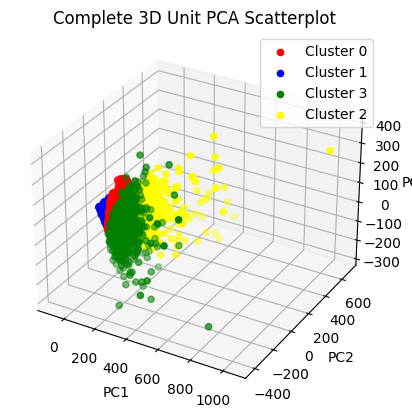

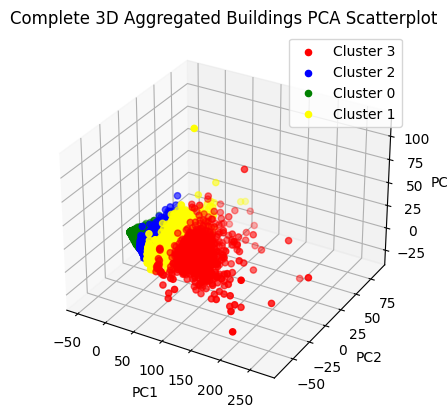

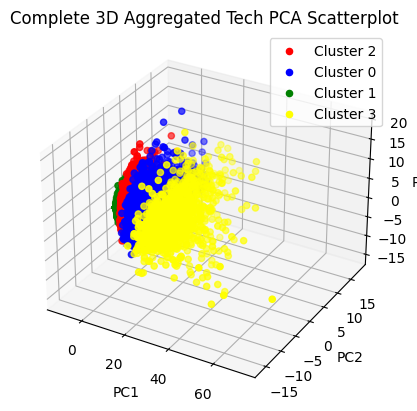

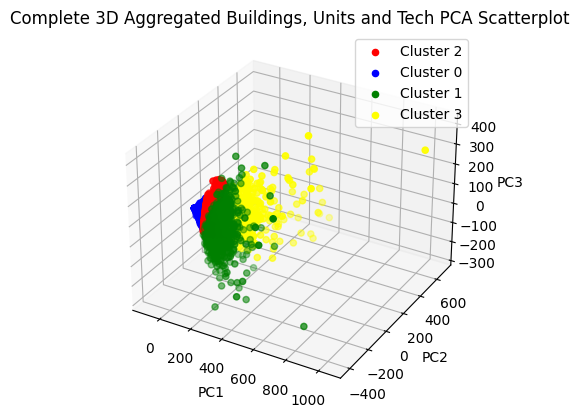

In [15]:
plot_3d_scatterplot(aggregated_unit_clustered_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'cluster'], 'Complete 3D Unit PCA Scatterplot')
plot_3d_scatterplot(aggregated_building_clustered_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building', 'cluster'], 'Complete 3D Aggregated Buildings PCA Scatterplot')
plot_3d_scatterplot(aggregated_tech_clustered_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech', 'cluster'], 'Complete 3D Aggregated Tech PCA Scatterplot')
plot_3d_scatterplot(aggregated_building_unit_tech_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building',
                                                         'Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units','Building Tech', 'Economy Tech',
                                                           'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech',
                                                             'cluster' ], 'Complete 3D Aggregated Buildings, Units and Tech PCA Scatterplot')



In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_function(df_to_visualize, columns, title):

    selected_columns = df_to_visualize[columns]

    tsne = TSNE(n_components=2, random_state=42)
    X = selected_columns.select_dtypes(include=[np.number])

    X_tsne = tsne.fit_transform(X)
    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

    cluster_labels = df_to_visualize['cluster']
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(title)

    #filename = title.replace(' ', '_').lower()
    #save_path = 'C:/Users/jakob/Desktop/Code Seminar Strategy Mining/plots/' + filename + '.png'
    #plt.savefig(save_path)
    
    plt.show()


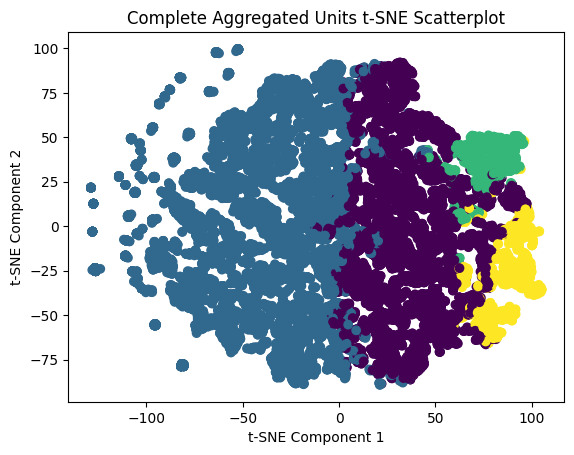

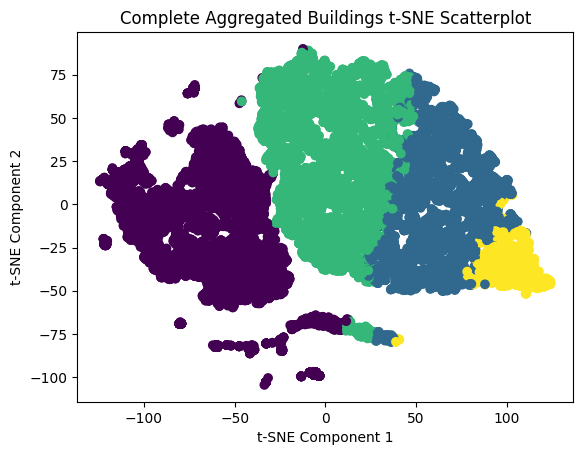

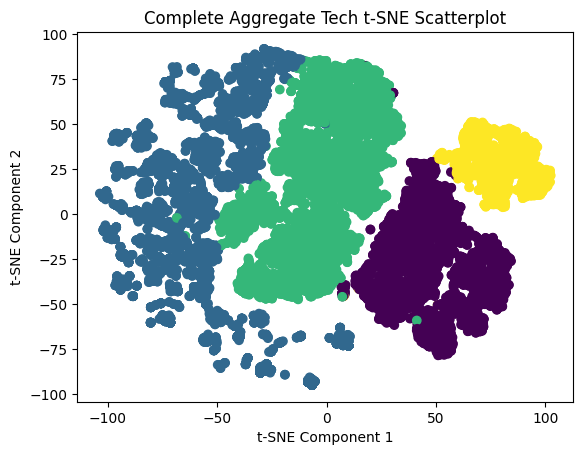

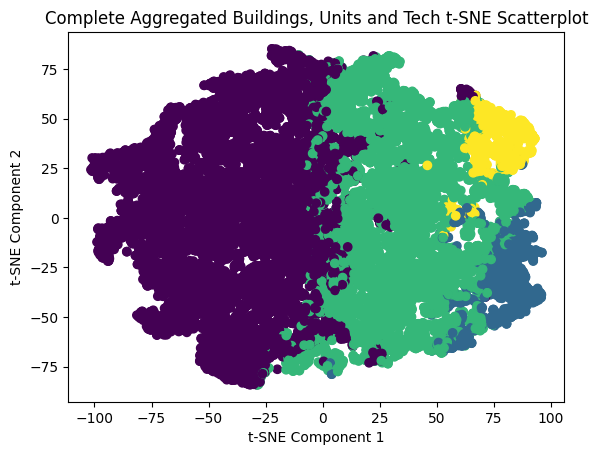

In [17]:
tsne_function(aggregated_unit_clustered_df, ['Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units', 'cluster'], 'Complete Aggregated Units t-SNE Scatterplot')
tsne_function(aggregated_building_clustered_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building', 'cluster'], 'Complete Aggregated Buildings t-SNE Scatterplot')
tsne_function(aggregated_tech_clustered_df, ['Building Tech', 'Economy Tech', 'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech', 'cluster'], 'Complete Aggregate Tech t-SNE Scatterplot')
tsne_function(aggregated_building_unit_tech_df, ['Economic Building', 'Research Building', 'Defensive Building', 'Military Building', 'Other Building',
                                                         'Ranged Units', 'Melee Units', 'Cavalry Units', 'Siege Units', 'Other Units','Building Tech', 'Economy Tech',
                                                           'Monastery Tech', 'Infantery Tech', 'Missile-Siege Tech', 'Cavalry Tech', 'Dock Tech', 'Other Tech', 'Age Tech',
                                                             'cluster' ], 'Complete Aggregated Buildings, Units and Tech t-SNE Scatterplot')

